# ML Part 1: Numeric Data Cleaning, Feature Engineering, and Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np

In [2]:
info = pd.read_excel("Data.xlsx", index_col='ASIN')
info.head(2)

,Subcategory,Rank,Scrape Term,Link,Brand,SKU,Title,Description,Price,Verified Subcategory,Verified Scrape Term,2019
ASIN,,,,,,,,,,,,
B0192Y9XSE,DP and MDP Display Adapters,1,displayport adapter,https://amazon.com/EAuU3Axj/dp/B0192Y9XSE/ref=...,CableDeconn,BC75629,CABLEDECONN Multi-Function Displayport Dp to H...,Connects a DisplayPort DP equipped laptop or d...,$13.99,DP and MDP Display Adapters,displayport adapter,14.0
B017Q8ZVWK,DP and MDP Display Adapters,2,displayport adapter,https://amazon.com/RbKBzVXn/dp/B017Q8ZVWK/ref=...,BENFEI,000095black,"DisplayPort to HDMI, Benfei Gold-Plated DP Dis...",COMPACT DESIGN - The compact-designed portable...,$9.99,DP and MDP Display Adapters,hdmi to displayPort,1143.0


In [3]:
'''A Few Features that we are interested in: Price, Title, Description, Verified Subcategory'''
info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 12 columns):
Subcategory             1185 non-null object
Rank                    1185 non-null int64
Scrape Term             1185 non-null object
Link                    1185 non-null object
Brand                   1182 non-null object
SKU                     857 non-null object
Title                   1182 non-null object
Description             1173 non-null object
Price                   1100 non-null object
Verified Subcategory    885 non-null object
Verified Scrape Term    1184 non-null object
2019                    885 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 120.4+ KB


In [4]:
'''
    First, drop the unimportant features and keep the ones we want.
    Note that we keep the link for future data cleaning 
'''
irrelevant = ['Subcategory','Rank', 'Scrape Term', 'Brand', 'SKU', 'Verified Scrape Term']
info.drop(irrelevant, axis=1, inplace=True)
info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 6 columns):
Link                    1185 non-null object
Title                   1182 non-null object
Description             1173 non-null object
Price                   1100 non-null object
Verified Subcategory    885 non-null object
2019                    885 non-null float64
dtypes: float64(1), object(5)
memory usage: 64.8+ KB


In [5]:
'''
    Verified Subcategory has only 885 non-null object, which is significant. We need to figure out why. 
'''
info[pd.isnull(info["Verified Subcategory"])].head(10)

,Link,Title,Description,Price,Verified Subcategory,2019
ASIN,,,,,,
B0716JB81J,https://amazon.com/ViMP6F36/dp/B0716JB81J/ref=...,gofanco Mini DisplayPort (Thunderbolt 2) Video...,✔ Convert your system’s Mini DisplayPort outpu...,$52.99,NaN,NaN
B07KRMRJZD,https://amazon.com/0WalbGQE/dp/B07KRMRJZD/ref=...,(Latest Gen) OmniMaster 9 in 1 USB C Hub with ...,PLUG AND PLAY: This 9-in-1 USB C Hub includes ...,$59.99,NaN,NaN
B07WWLXY7X,https://amazon.com/nmjLaM2x/dp/B07WWLXY7X/ref=...,"USB C Hub, TOTU Upgraded 12 in 1 Type C Hub to...",Massive Docking Station: Please make sure that...,$79.99,NaN,NaN
B06Y5N3YCD,https://amazon.com/bvm4cMk8/dp/B06Y5N3YCD/ref=...,Cable Matters USB C Multiport Adapter (USB C H...,"Display Port USBC dock adds Ethernet, USB, Dis...",$40.99,NaN,NaN
B07X1J7R34,https://amazon.com/UErmGnhV/dp/B07X1J7R34/ref=...,"USB C Hub,Tiergrade 12 in 1 Triple Display Ada...",[12-in-1 USB C Hub] - Tiergrade plug-and-play ...,$81.99,NaN,NaN
B082KMKQQX,https://amazon.com/v9XFKkBu/dp/B082KMKQQX/ref=...,Lasuney Triple Display USB Type C HUB with to ...,[NOTE] The Mac OS itself does not support spli...,$59.99,NaN,NaN
B079MDQDP4,https://amazon.com/pZi8swG9/dp/B079MDQDP4/ref=...,Dell USB-C Mobile Adapter (DA300),Connect to 4K displays at 60Hz via DP or HDMI ...,$66.52,NaN,NaN
B07Y652NL2,https://amazon.com/NRlOjUcK/dp/B07Y652NL2/ref=...,"Updated Version USB C Hub, YEMO 12 in 1 Type C...",✔️ All-You-Need 12-in-1 Professional USB-C Hub...,$65.99,NaN,NaN
B07X7TNRHH,https://amazon.com/pKWfEFdp/dp/B07X7TNRHH/ref=...,"USB-C Hub 9-in-1 Adapter with 4K HDMI, Mini DP...",✅【9 in 1 USB-C Hub】: USB C port to 9 practical...,$39.99,NaN,NaN


In [6]:
'''
    From this step we can find out that NaN is not a missing value; 
    any ASIN with NaN in "Verified Subcategory" just simply because they don't fit in any desired categories.
    Thus we want to keep these ASINs.
'''
info['Verified Subcategory'].fillna('None', inplace=True) 
info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 6 columns):
Link                    1185 non-null object
Title                   1182 non-null object
Description             1173 non-null object
Price                   1100 non-null object
Verified Subcategory    1185 non-null object
2019                    885 non-null float64
dtypes: float64(1), object(5)
memory usage: 64.8+ KB


In [7]:
'''
    There are also some missing value for Description. 
    We need to examinate that.
'''
info[pd.isnull(info["Description"])]

,Link,Title,Description,Price,Verified Subcategory,2019
ASIN,,,,,,
B076DTRZ58,https://amazon.com/BHZFQKpj/dp/B076DTRZ58/ref=...,Mini DisplayPort to HDMI DVI DP 4K VGA Adapter...,NaN,$20.99,DP and MDP Display Adapters,47.0
B01J3BQ88Y,https://amazon.com/Xr93aRCl/dp/B01J3BQ88Y/ref=...,ICZI Mini DisplayPort Male (Thunderbolt Port C...,NaN,$7.49,DP and MDP Display Adapters,0.0
B083L6NN24,https://amazon.com/QOq4ET22/dp/B083L6NN24/ref=...,"Mini DisplayPort to HDMI Adapter, Newsoul Mini...",NaN,$9.99,DP and MDP Display Adapters,0.0
B01GUSJR54,https://amazon.com/aI4J2olC/dp/B01GUSJR54/ref=...,"Thunderbolt to VGA, ICZI Video Pioneer Mini Di...",NaN,$6.63,DP and MDP Display Adapters,0.0
B003VREWT4,https://amazon.com/hMq0GInL/dp/B003VREWT4/ref=...,NaN,NaN,NaN,None,NaN
B071P93NR4,https://amazon.com/fRqCzbum/dp/B071P93NR4/ref=...,"DisplayPort to VGA Cable 10 feet, UVOOI Gold P...",NaN,$9.99,DP and MDP Display Adapters,0.0
B009ENYJPG,https://amazon.com/UPnDNCQr/dp/B009ENYJPG/ref=...,uxcell a12071300ux0259 Female Splitter Adapter...,NaN,$6.99,HDMI and DVI Adapters,4.0
B07V5R74NB,https://amazon.com/usXRyR4X/dp/B07V5R74NB/ref=...,CFIKTE HDMI to VGA HD Cable HDMI to VGA Cable ...,NaN,NaN,HDMI and DVI Adapters,26.0
B083Q1PB8F,https://amazon.com/9FkDNKoQ/dp/B083Q1PB8F/ref=...,"AE HDMI to VGA, Gold-Plated HDMI to VGA Adapte...",NaN,$8.85,HDMI and DVI Adapters,0.0


In [8]:
'''
    By checking these links, we find out that these products do not have descriptions. 
    Thus we am going to use the title instead of description for these ASINs.
'''

info["Description"] = info.apply(
    lambda row: row['Title'] if pd.isnull(row['Description'])else row['Description'],
    axis=1
)

info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 6 columns):
Link                    1185 non-null object
Title                   1182 non-null object
Description             1182 non-null object
Price                   1100 non-null object
Verified Subcategory    1185 non-null object
2019                    885 non-null float64
dtypes: float64(1), object(5)
memory usage: 64.8+ KB


In [9]:
'''
    We finally take a look at the missing data in Price column
'''
info[pd.isnull(info["Price"])]

,Link,Title,Description,Price,Verified Subcategory,2019
ASIN,,,,,,
B00S0C7QO8,https://amazon.com/zYPh8ByX/dp/B00S0C7QO8/ref=...,Plugable Active DisplayPort to HDMI Adapter - ...,Active adapter enables you to connect a Displa...,NaN,DP and MDP Display Adapters,71.0
B083JTJHH4,https://amazon.com/Ht0SLkU2/dp/B083JTJHH4/ref=...,"DisplayPort to HDMI, Answin 4K DisplayPort to ...","【Rugged Series】Durable, nylon-braided construc...",NaN,DP and MDP Display Adapters,0.0
B06XNQTMXW,https://amazon.com/9ZQd2vFJ/dp/B06XNQTMXW/ref=...,Display Port(DP) Male to VGA Female Adapter Cable,Support display port V1.2 and display port 20p...,NaN,DP and MDP Display Adapters,1.0
B085NWVZ1K,https://amazon.com/1OzgLvc4/dp/B085NWVZ1K/ref=...,"Display Port to VGA,3 Pack, Linkhood Gold-Plat...",Applications: Connect Notebook / Desktop with ...,NaN,DP and MDP Display Adapters,0.0
B01699044M,https://amazon.com/S2wfgLp2/dp/B01699044M/ref=...,Microsoft Surface VGA Adapter,1 x DisplayPort 1.2 Male Connector\n1 x VGA Fe...,NaN,DP and MDP Display Adapters,16.0
...,...,...,...,...,...,...
B07QKBV6TP,https://amazon.com/TfMMFnv1/dp/B07QKBV6TP/ref=...,Doitby USB C to HDMI Cable Type C to HDMI Adap...,[Plug-and-Play Device] Doitby usb c to hdmi ca...,NaN,USB-C Display Adapters,15.0
B07TV2M75H,https://amazon.com/1LWLJ05o/dp/B07TV2M75H/ref=...,"RCA USB C to HDMI VGA Adapter, USB Type-C Hub ...",Hdmi & VGA output: This USB C to HDMI and VGA ...,NaN,USB-C Display Adapters,17.0
B08628BXW7,https://amazon.com/dxLgdn75/dp/B08628BXW7/ref=...,Aluminium USB C Type C to VGA Adapter Cable Ro...,"Reversible, symmetrical USB-C connector\nAdapt...",NaN,USB-C Display Adapters,0.0


In [10]:
'''
    We realized that these ASINs are only available through resellers. Thus these data are missing at random. 
    We have two options: 1. drop missing rows 2. fill these NaN 
    We will use the second approach: filling these NaN by group mean
    Also this suggests that there are possible improvements can be made during data collection step 
'''


'\n    We realized that these ASINs are only available through resellers. Thus these data are missing at random. \n    We have two options: 1. drop missing rows 2. fill these NaN \n    We will use the second approach: filling these NaN by group mean\n    Also this suggests that there are possible improvements can be made during data collection step \n'

In [11]:
'''
    First we need to transform Price Data into numeric type
'''

import re
def find_float(a_string):
    if isinstance(a_string, str):
        pattern = r"\d*\.\d*"
        number = re.search(pattern, a_string)
        if number: return float(number.group(0))

    return None

info['Price']=info['Price'].apply(find_float)
info['Price'].head()

ASIN
B0192Y9XSE    13.99
B017Q8ZVWK     9.99
B014RWWURC    12.00
B07YDNSGY2    17.99
B00Z08TZNU     8.99
Name: Price, dtype: float64

In [12]:
'''
    We also need to consider the fact that some ASINs have more than one unit of products (like 2-Pack, 10-Pack)
    We need to average the price as well
'''
def find_unit(a_string):
    pattern = r"([1-9][0-9]*)[-\s][Pp][Aa][Cc][Kk]"
    unit = re.search(pattern, a_string)
    if unit: return int(unit.group(1))
    
    return 1

info['unit'] = info['Description'].apply(find_unit)

info['unit'].unique()

info['Price']= info['Price']/info['unit']
info['Price'].head()

TypeError: expected string or bytes-like object

In [13]:
'''
    Now we can transform the price into unit price
'''
info['Price'] = info.groupby('Verified Subcategory')['Price'].transform(
    lambda group: group.fillna(np.mean(group))
)

info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 6 columns):
Link                    1185 non-null object
Title                   1182 non-null object
Description             1182 non-null object
Price                   1185 non-null float64
Verified Subcategory    1185 non-null object
2019                    885 non-null float64
dtypes: float64(2), object(4)
memory usage: 64.8+ KB


In [14]:
'''
    After Data cleaning, we will do some exploratory data analysis
    We will create a new DataFrame that has only Description, Price, and Verified Subcategory 
'''

data = info[['Description', 'Price', 'Verified Subcategory']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, B0192Y9XSE to B084WNX1C2
Data columns (total 3 columns):
Description             1182 non-null object
Price                   1185 non-null float64
Verified Subcategory    1185 non-null object
dtypes: float64(1), object(2)
memory usage: 37.0+ KB


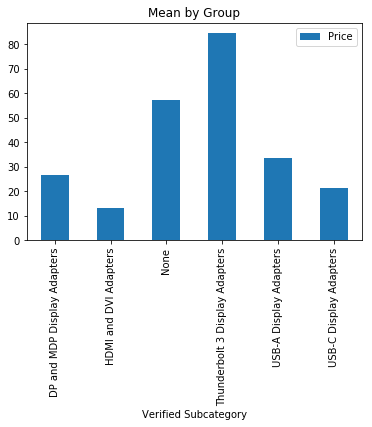

In [16]:
'''
    We want to know if price is significantly different between different categories
'''
import matplotlib.pyplot as plt
data.groupby('Verified Subcategory').mean().plot(kind='bar', title='Mean by Group')
plt.show()

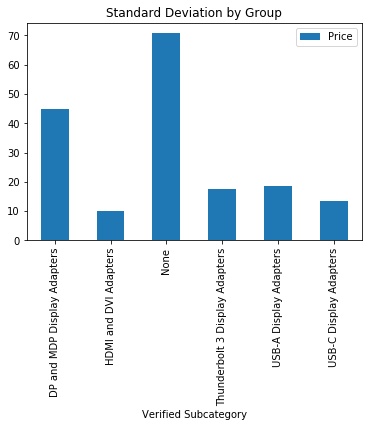

In [17]:
data.groupby('Verified Subcategory').std().plot(kind='bar', title='Standard Deviation by Group')
plt.show()

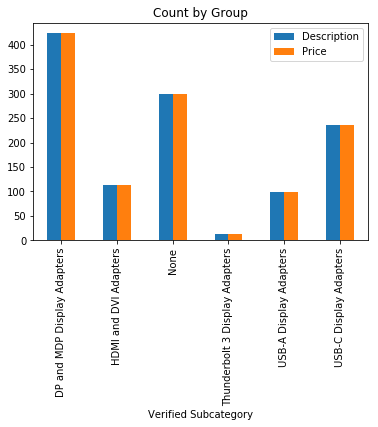

In [16]:
'''
    We also want to take a look at the counts for each column
'''
data.groupby('Verified Subcategory').count().plot(kind='bar', title='Count by Group')
plt.show()

In [18]:
'''
    DP & MDP and None have high counts as well as high variance
    This might affect model performance
'''

'\n    DP & MDP and None have high counts as well as high variance\n    This might affect model performance\n'

In [19]:
'''
    Since the price is quite different for most of the categories, 
    we decided to consider price as a feature when we build our model.
    Now we save the new DataFrame into an excel file
'''

data.to_excel("Numeric Cleaned Data.xlsx")